<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" />
    
    
### <font color='navy'> Modelos no lineales para pronósticos.

**Nombres:** Francisco Tinoco

**Fecha:** 15 de Marzo del 2025.

**Expediente** : 746080.
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: Link con el enlace del repositorio del creador del proyecto

# Tarea X: Clase X

In [61]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import concatenate
from keras.utils import plot_model
from keras.layers import Input
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Leer el CSV en un DataFrame
df = pd.read_csv("Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
# Convertir variables categóricas a numéricas
for col in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']:
    df[col] = LabelEncoder().fit_transform(df[col])

# Separar características y variable objetivo
X = df.drop(columns=['price'])
y = df['price']

In [ ]:
# Normalizar datos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Convertir datos en "imagen" (reshape a 2D)
n_features = X_scaled.shape[1]  # Número de características
X_reshaped = X_scaled.reshape(-1, n_features, 1, 1)  # (samples, features, 1, 1)


In [ ]:
#  Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_scaled, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Reshape

# Definir el modelo CNN
model = Sequential([
    Conv2D(64, kernel_size=(3, 1), activation='relu', input_shape=(n_features, 1, 1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Salida para regresión
])

In [ ]:
# Compilar el modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
# Entrenar el modelo
model.fit(X_train, y_train, epochs=100, batch_size=20, validation_data=(X_test, y_test))


Epoch 1/100
22/22 [==============================] - 1s 10ms/step - loss: 0.0217 - mae: 0.1052 - val_loss: 0.0167 - val_mae: 0.0934
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0095 - mae: 0.0711 - val_loss: 0.0143 - val_mae: 0.0903
Epoch 3/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0083 - mae: 0.0668 - val_loss: 0.0137 - val_mae: 0.0877
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0073 - mae: 0.0620 - val_loss: 0.0143 - val_mae: 0.0881
Epoch 5/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0082 - mae: 0.0664 - val_loss: 0.0168 - val_mae: 0.0928
Epoch 6/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0081 - mae: 0.0659 - val_loss: 0.0139 - val_mae: 0.0896
Epoch 7/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0065 - mae: 0.0586 - val_loss: 0.0141 - val_mae: 0.0915
Epoch 8/100
22/22 [==============================] - 0s 3ms/step - loss: 0.0062 - 

In [ ]:
# Evaluar el modelo
loss, mae = model.evaluate(X_test, y_test)
print(f'MAE en test set: {mae}')

4/4 [==============================] - 0s 2ms/step - loss: 0.0171 - mae: 0.0972
MAE en test set: 0.09722241759300232


### obtener predicciones

In [ ]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [ ]:
df_comparacion = pd.DataFrame({'Real': y_test.flatten(), 'Predicho': y_pred.flatten()})
print(df_comparacion.head(10))  # Ver las primeras 10 comparaciones


       Real  Predicho
0  0.200000  0.390210
1  0.424242  0.547986
2  0.169697  0.166885
3  0.406061  0.241607
4  0.090909  0.146231
5  0.272727  0.160723
6  0.303030  0.254702
7  0.241818  0.273813
8  0.060606  0.215515
9  0.138788  0.118046


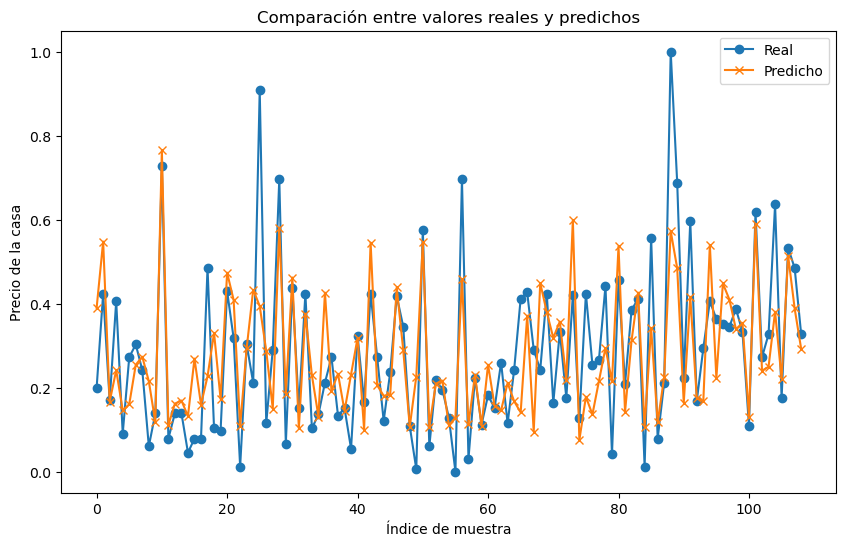

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Real", marker='o')
plt.plot(y_pred, label="Predicho", marker='x')
plt.legend()
plt.xlabel("Índice de muestra")
plt.ylabel("Precio de la casa")
plt.title("Comparación entre valores reales y predichos")
plt.show()

## PARTE 2 :

-- https://www.kaggle.com/datasets/joebeachcapital/nsw-australia-electricity-demand-2018-2023/data. Por el contrario en este dataset ya se proporciona una serie temporal, donde el objetivo es predecir el consumo de demnada eléctrico en Australia. Con esta serie temporal, si pueden aplicar las funciones de preparación de datos para CNN como se vió en clase.

In [2]:
import pandas as pd

# Ruta del archivo
ruta_csv = "/content/PRICE_AND_DEMAND_202306_NSW1.csv"

# Cargar el archivo CSV
df = pd.read_csv(ruta_csv)

In [3]:
df

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,NSW1,2023/06/01 00:05:00,7953.04,90.20,TRADE
1,NSW1,2023/06/01 00:10:00,7967.67,90.20,TRADE
2,NSW1,2023/06/01 00:15:00,7923.89,90.20,TRADE
3,NSW1,2023/06/01 00:20:00,7907.81,90.20,TRADE
4,NSW1,2023/06/01 00:25:00,7855.31,90.20,TRADE
...,...,...,...,...,...
7771,NSW1,2023/06/27 23:40:00,8536.43,116.99,TRADE
7772,NSW1,2023/06/27 23:45:00,8527.02,89.00,TRADE
7773,NSW1,2023/06/27 23:50:00,8489.29,88.88,TRADE
7774,NSW1,2023/06/27 23:55:00,8358.07,61.74,TRADE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7776 entries, 0 to 7775
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   REGION          7776 non-null   object 
 1   SETTLEMENTDATE  7776 non-null   object 
 2   TOTALDEMAND     7776 non-null   float64
 3   RRP             7776 non-null   float64
 4   PERIODTYPE      7776 non-null   object 
dtypes: float64(2), object(3)
memory usage: 303.9+ KB


In [5]:
df.describe()

,TOTALDEMAND,RRP
count,7776.000000,7776.000000
mean,8382.620156,106.006049
std,1384.479890,248.338411
min,5642.400000,-50.010000
25%,7304.410000,64.990000
50%,8207.640000,89.000000
75%,9336.162500,117.940000
max,12589.220000,14800.000000


In [6]:
# Convertir la columna de fecha a formato datetime
df["SETTLEMENTDATE"] = pd.to_datetime(df["SETTLEMENTDATE"])

In [7]:
# Ordenar los datos por fecha
df = df.sort_values(by="SETTLEMENTDATE")

In [14]:
df.head(20)

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,NSW1,2023-06-01 00:05:00,7953.04,90.20,TRADE
1,NSW1,2023-06-01 00:10:00,7967.67,90.20,TRADE
2,NSW1,2023-06-01 00:15:00,7923.89,90.20,TRADE
3,NSW1,2023-06-01 00:20:00,7907.81,90.20,TRADE
4,NSW1,2023-06-01 00:25:00,7855.31,90.20,TRADE
5,NSW1,2023-06-01 00:30:00,7880.03,90.20,TRADE
6,NSW1,2023-06-01 00:35:00,7817.32,90.20,TRADE
7,NSW1,2023-06-01 00:40:00,7781.64,90.51,TRADE
8,NSW1,2023-06-01 00:45:00,7716.52,89.00,TRADE
9,NSW1,2023-06-01 00:50:00,7701.81,90.20,TRADE


Aquí nos podemos dar cuenta que los datos están ordenados cada 5 minutos y por lo tanto podemos hacer un promedio de ordenarlos por ejemplo cada media hora o cada hora para que se siga manteniendo la información, pero primero probaremos así los datos normales :

In [10]:
# Usar solo la columna de demanda
data = df["TOTALDEMAND"].values.reshape(-1, 1)

In [13]:
data

array([[7953.04],
       [7967.67],
       [7923.89],
       ...,
       [8489.29],
       [8358.07],
       [8394.93]])

## Normalizar los datos

Como las CNN son sensibles a los valores de entrada, aplicamos normalización:

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

## Crear secuencias de datos para la CNN

La idea es transformar la serie en ventanas deslizantes de tamaño n_steps. Cada ventana de n_steps se usará como entrada y el siguiente valor será la etiqueta.

In [ ]:
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps])
        y.append(data[i + n_steps])
    return np.array(X), np.array(y)

n_steps = 10  # Tamaño de la ventana de observación
X, y = create_sequences(data_scaled, n_steps)

# Reshape para que sea compatible con la CNN: (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))


In [ ]:
split = int(len(X) * 0.8)  # 80% para entrenamiento
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


## Construir la CNN

Ahora definimos la arquitectura de la CNN para aprender patrones temporales en los datos.

In [ ]:
model = keras.Sequential([
    keras.layers.Conv1D(filters=64, kernel_size=3, activation="relu", input_shape=(n_steps, 1)),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(optimizer="adam", loss="mse", metrics=["mae"])


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 8, 64)             256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 4, 64)            0         
 )                                                               
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 50)                12850     
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 13,157
Trainable params: 13,157
Non-trainable params: 0
__________________________________________________

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
195/195 [==============================] - 1s 3ms/step - loss: 0.0063 - mae: 0.0476 - val_loss: 0.0015 - val_mae: 0.0312
Epoch 2/50
195/195 [==============================] - 1s 3ms/step - loss: 8.0381e-04 - mae: 0.0221 - val_loss: 3.5868e-04 - val_mae: 0.0147
Epoch 3/50
195/195 [==============================] - 0s 2ms/step - loss: 1.7884e-04 - mae: 0.0105 - val_loss: 1.5448e-04 - val_mae: 0.0099
Epoch 4/50
195/195 [==============================] - 1s 3ms/step - loss: 1.1949e-04 - mae: 0.0086 - val_loss: 1.3887e-04 - val_mae: 0.0091
Epoch 5/50
195/195 [==============================] - 0s 2ms/step - loss: 1.2300e-04 - mae: 0.0087 - val_loss: 1.3463e-04 - val_mae: 0.0092
Epoch 6/50
195/195 [==============================] - 0s 3ms/step - loss: 1.1285e-04 - mae: 0.0083 - val_loss: 1.3770e-04 - val_mae: 0.0093
Epoch 7/50
195/195 [==============================] - 0s 2ms/step - loss: 1.2449e-04 - mae: 0.0087 - val_loss: 1.6066e-04 - val_mae: 0.0098
Epoch 8/50
195/195 [========

<Axes: >

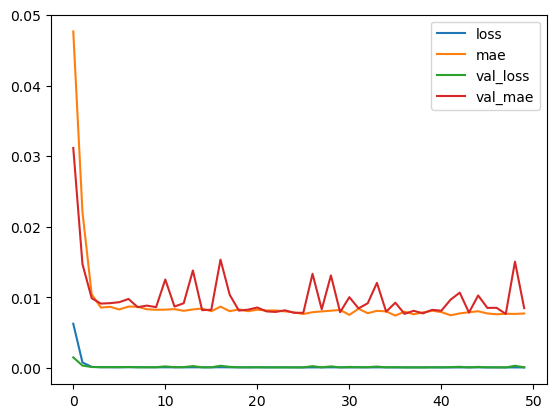

In [ ]:
pd.DataFrame(history.history).plot()

* Fuerte descenso inicial en las curvas (épocas 0-5)

Significa: El modelo está aprendiendo rápidamente patrones en los datos, reduciendo tanto la pérdida como el MAE.

* Estabilización de loss y mae después de ~5 épocas

Significa: El modelo sigue mejorando, pero a un ritmo más lento. Esto es normal y esperado.

* val_loss y val_mae son más erráticas que loss y mae

Significa: Hay cierta inestabilidad en la validación. Podría indicar que:

El modelo está sobreajustando (memoriza en lugar de generalizar).

La validación tiene más ruido o variabilidad en los datos.

* Diferencia entre train y val (posible overfitting)

Si la val_loss y val_mae son consistentemente más altas que loss y mae, significa que el modelo se ajusta demasiado a los datos de entrenamiento y no generaliza bien.

In [ ]:
loss, mae = model.evaluate(X_test, y_test)
print(f"MAE en test set: {mae}")

49/49 [==============================] - 0s 2ms/step - loss: 1.1372e-04 - mae: 0.0085
MAE en test set: 0.008486677892506123


In [ ]:
import matplotlib.pyplot as plt

# Predicciones en test set
y_pred = model.predict(X_test)

49/49 [==============================] - 0s 1ms/step


In [ ]:
# Invertir la normalización
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

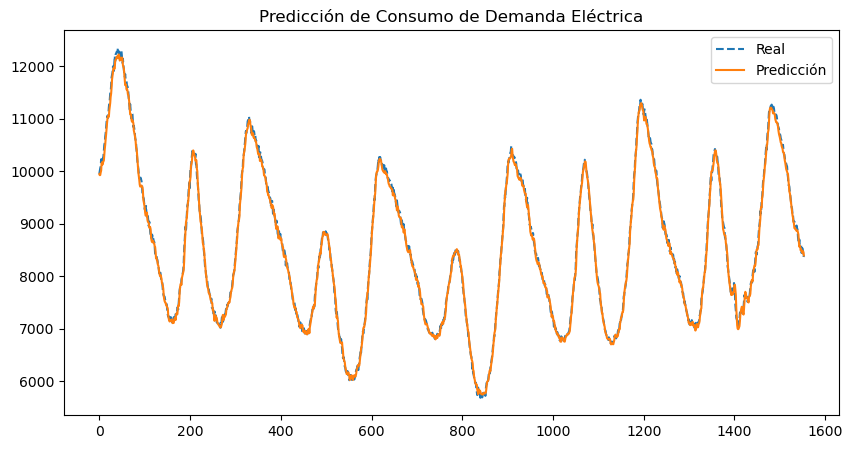

In [ ]:
# Graficar
plt.figure(figsize=(10, 5))
plt.plot(y_test_inv, label="Real", linestyle="dashed")
plt.plot(y_pred_inv, label="Predicción")
plt.legend()
plt.title("Predicción de Consumo de Demanda Eléctrica")
plt.show()

In [ ]:
#################

In [10]:
# dividir una secuencia univariada en muestras
def split_univariate_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps

        # comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence)-1:
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [11]:
# Elegir un número de pasos de tiempo
n_steps = 10
# Número de características de mis datos
n_features = 1

In [12]:
# Dividir en muestras
X, y = split_univariate_sequence(data, n_steps)

In [ ]:
data.shape

(7776, 1)

In [ ]:
print('X', X, 'y', y, sep='\n')

X
[[[7953.04]
  [7967.67]
  [7923.89]
  ...
  [7781.64]
  [7716.52]
  [7701.81]]

 [[7967.67]
  [7923.89]
  [7907.81]
  ...
  [7716.52]
  [7701.81]
  [7679.66]]

 [[7923.89]
  [7907.81]
  [7855.31]
  ...
  [7701.81]
  [7679.66]
  [7597.57]]

 ...

 [[8663.23]
  [8626.3 ]
  [8697.24]
  ...
  [8441.95]
  [8536.43]
  [8527.02]]

 [[8626.3 ]
  [8697.24]
  [8582.15]
  ...
  [8536.43]
  [8527.02]
  [8489.29]]

 [[8697.24]
  [8582.15]
  [8593.02]
  ...
  [8527.02]
  [8489.29]
  [8358.07]]]
y
[[7679.66]
 [7597.57]
 [7600.1 ]
 ...
 [8489.29]
 [8358.07]
 [8394.93]]


In [ ]:
X.shape

(7766, 10, 1)

In [ ]:
y.shape

(7766, 1)

In [16]:
# Definimos nuestro modelo
model_1 = Sequential()
model_1.add(keras.layers.Input(shape=(n_steps, n_features)))
model_1.add(Conv1D(64, 2, activation='relu'))
model_1.add(MaxPooling1D())
model_1.add(Flatten())
model_1.add(Dense(50, activation='relu'))
model_1.add(Dense(1))
model_1.compile(optimizer='adam', loss='mse')
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 9, 64)               │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 4, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │          12,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,093 (51.14 KB)

 Trainable params: 13,093 (51.14 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# reshape de [samples, timesteps] a [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], n_features))
X

array([[[7953.04],
        [7967.67],
        [7923.89],
        ...,
        [7781.64],
        [7716.52],
        [7701.81]],

       [[7967.67],
        [7923.89],
        [7907.81],
        ...,
        [7716.52],
        [7701.81],
        [7679.66]],

       [[7923.89],
        [7907.81],
        [7855.31],
        ...,
        [7701.81],
        [7679.66],
        [7597.57]],

       ...,

       [[8663.23],
        [8626.3 ],
        [8697.24],
        ...,
        [8441.95],
        [8536.43],
        [8527.02]],

       [[8626.3 ],
        [8697.24],
        [8582.15],
        ...,
        [8536.43],
        [8527.02],
        [8489.29]],

       [[8697.24],
        [8582.15],
        [8593.02],
        ...,
        [8527.02],
        [8489.29],
        [8358.07]]])

In [18]:
# Ajustamos el modelo anterior
history_1 = model_1.fit(X, y, epochs=1000, verbose=False)

<Axes: >

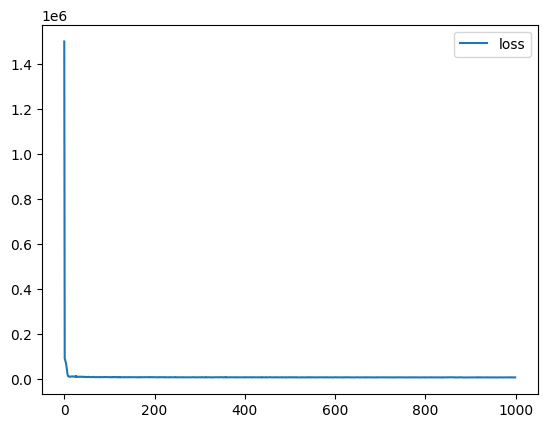

In [19]:
pd.DataFrame(history_1.history).plot()

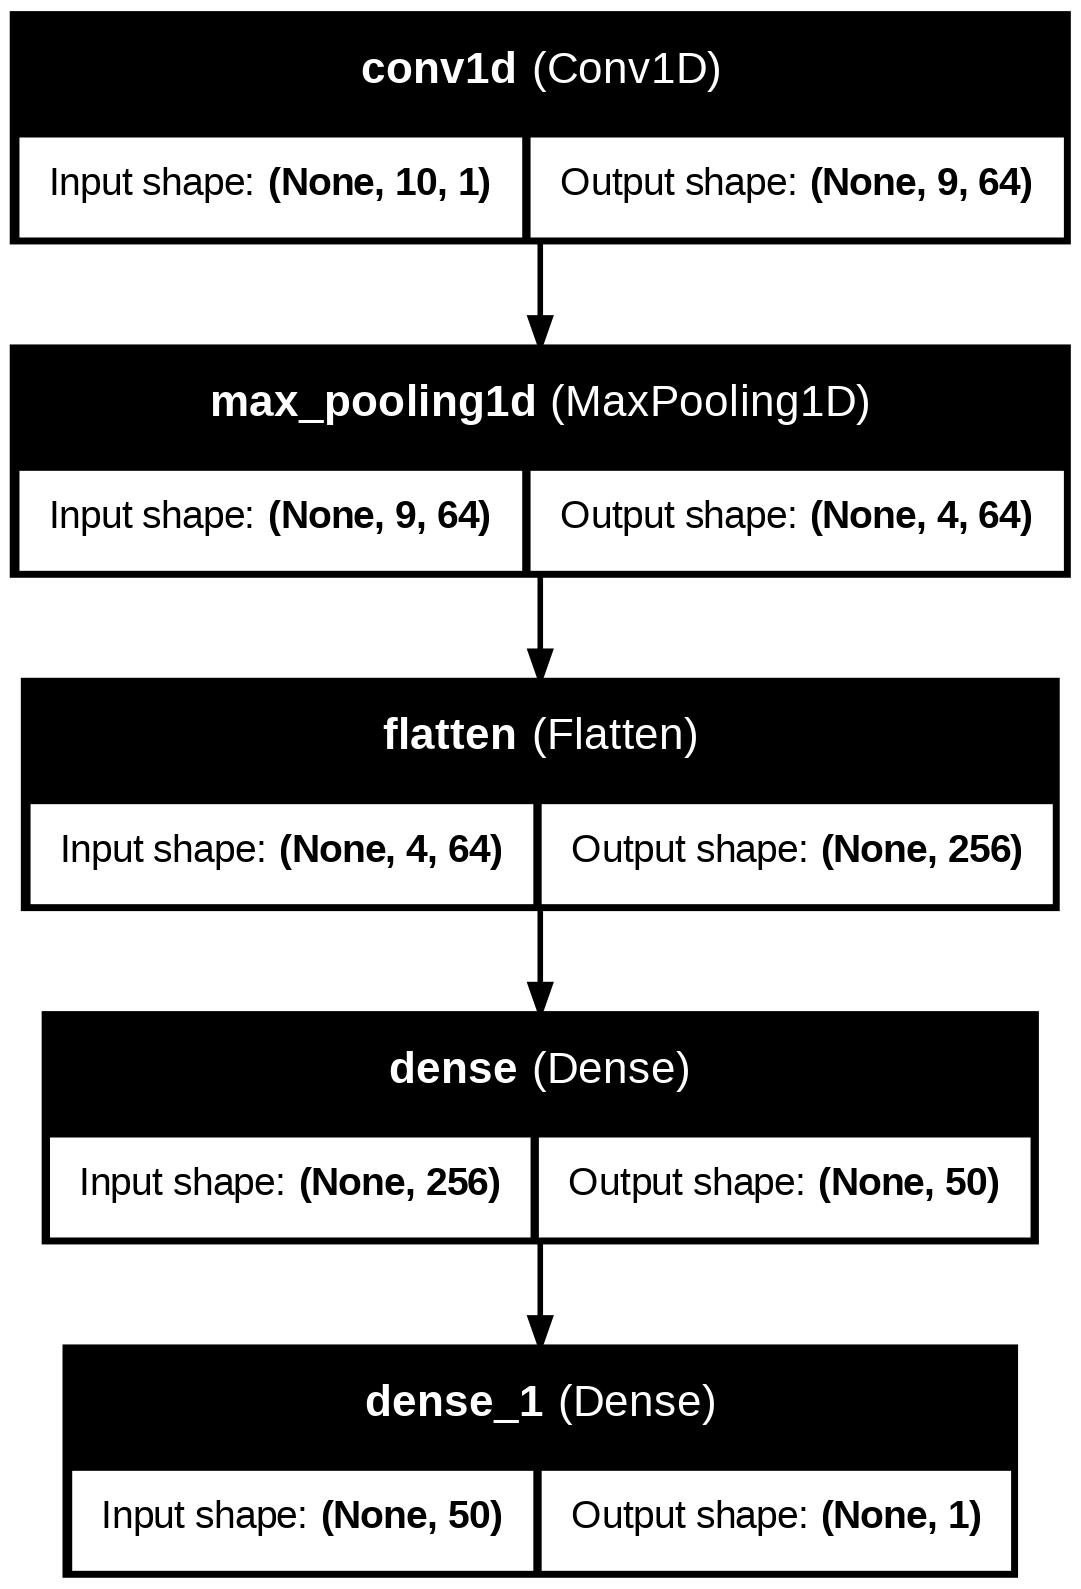

In [23]:
plot_model(model_1, show_shapes=True, show_layer_names=True)

## Ahora podemos hacer la prueba de los diferentes modelos ajustando los datos cada media hora

In [16]:
# Agrupar cada 30 minutos tomando la media
df_resampled = df.resample('30T', on='SETTLEMENTDATE').agg({
    'TOTALDEMAND': 'mean',  # Promedio de la demanda en cada intervalo
    'RRP': 'mean',          # Promedio del precio en cada intervalo
    'REGION': 'first',      # Tomamos el primer valor de la región (es constante)
    'PERIODTYPE': 'first'   # Tomamos el primer valor de tipo de periodo (es constante)
}).reset_index()

<ipython-input-16-6caca8a6a64b>:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_resampled = df.resample('30T', on='SETTLEMENTDATE').agg({


In [58]:
df_resampled

,SETTLEMENTDATE,TOTALDEMAND,RRP,REGION,PERIODTYPE
0,2023-06-01 00:00:00,7921.544000,90.200000,NSW1,TRADE
1,2023-06-01 00:30:00,7762.830000,90.103333,NSW1,TRADE
2,2023-06-01 01:00:00,7504.745000,89.593333,NSW1,TRADE
3,2023-06-01 01:30:00,7282.863333,89.776667,NSW1,TRADE
4,2023-06-01 02:00:00,6963.810000,82.853333,NSW1,TRADE
...,...,...,...,...,...
1292,2023-06-27 22:00:00,9050.625000,91.825000,NSW1,TRADE
1293,2023-06-27 22:30:00,8903.983333,69.828333,NSW1,TRADE
1294,2023-06-27 23:00:00,8626.703333,84.753333,NSW1,TRADE
1295,2023-06-27 23:30:00,8487.841667,89.075000,NSW1,TRADE


In [24]:
# Extraer los valores de TOTALDEMAND y RRP
total_demand = df_resampled["TOTALDEMAND"].values.reshape(-1, 1)
rrp = df_resampled["RRP"].values.reshape(-1, 1)

#### Concatenar los datos en una matriz

In [27]:
dataset = np.hstack([total_demand, rrp])

In [29]:
dataset.shape

(1297, 2)

In [56]:
dataset

array([[7921.544     ,   90.2       ],
       [7762.83      ,   90.10333333],
       [7504.745     ,   89.59333333],
       ...,
       [8626.70333333,   84.75333333],
       [8487.84166667,   89.075     ],
       [8394.93      ,   64.77      ]])

## Modelos CNN multivariados

In [30]:
# Función para dividir la serie en ventanas de tiempo
def split_multivariate_sequence(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence) - n_steps):
        X.append(sequence[i:i+n_steps, :])  # Entradas
        y.append(sequence[i+n_steps, 0])    # Salida (predecimos TOTALDEMAND)
    return np.array(X), np.array(y)

### Definir tamaño de la ventana temporal

In [31]:
n_steps = 3
X, y = split_multivariate_sequence(dataset, n_steps)

In [32]:
# Obtener número de características
n_features = X.shape[2]

#### Definir el modelo CNN

In [33]:
model = Sequential([
    keras.layers.Input(shape=(n_steps, n_features)),
    Conv1D(64, 2, activation='relu'),
    MaxPooling1D(),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)  # Predicción de TOTALDEMAND
])

In [34]:
model.compile(optimizer='adam', loss='mse')

In [35]:
model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 38600560.0000
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 588631.1250
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 356420.9375
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 344909.2812 
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 329349.2500
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 317911.8438
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 294254.4062
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 306383.8438
Epoch 9/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 276854.9688
Epoch 10/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 262014.3438
Epoch 11/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 277578.9062
Epoch 12/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 235902.8750
Epoch 13/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 226995.4062
Epoch 14/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 212414.70

#### Probar el modelo con datos recientes

In [36]:
x_input = dataset[-n_steps:]  # Últimos datos como entrada
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)

print(f"Predicción de TOTALDEMAND: {yhat[0][0]}")

Predicción de TOTALDEMAND: 8162.14306640625


# Probaremos con predicciones para los últimos 50 datos

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


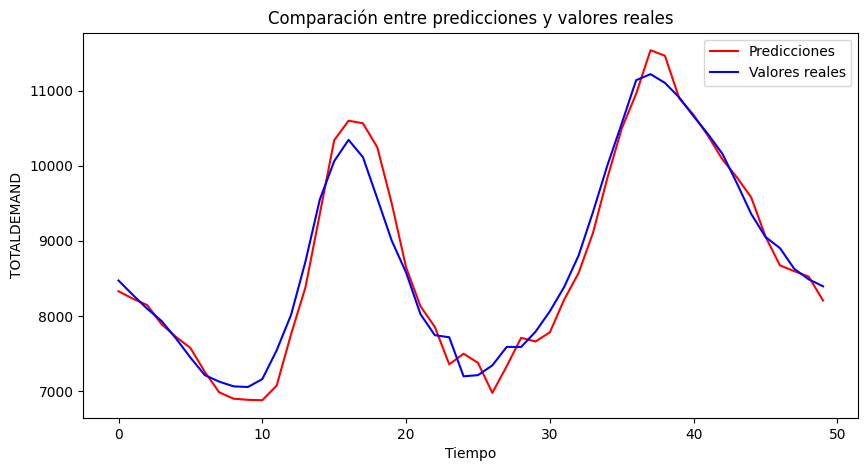

In [39]:
y_preds = model.predict(X[-50:])

plt.figure(figsize=(10,5))
plt.plot(range(len(y_preds)), y_preds, label="Predicciones", color='red')
plt.plot(range(len(y_preds)), y[-50:], label="Valores reales", color='blue')
plt.legend()
plt.xlabel("Tiempo")
plt.ylabel("TOTALDEMAND")
plt.title("Comparación entre predicciones y valores reales")
plt.show()


## AHORA PROBAREMOS CON EL  Modelo CNN con múltiples encabezamientos

In [41]:
#  Definir parámetros
n_steps = 3
n_features = 1

In [59]:
#  Datos reales
total_demand = df_resampled["TOTALDEMAND"].values.reshape(-1, 1)
rrp = df_resampled["RRP"].values.reshape(-1, 1)

In [62]:
#  Normalizar datos para mejorar la estabilidad del modelo
scaler_demand = MinMaxScaler()
scaler_rrp = MinMaxScaler()
total_demand = scaler_demand.fit_transform(total_demand)
rrp = scaler_rrp.fit_transform(rrp)

dataset = np.hstack([total_demand, rrp])

In [63]:
#  Función para crear secuencias de datos con n_steps
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps, :])
        y.append(data[i + n_steps, 0])  # Predicción = TOTALDEMAND siguiente
    return np.array(X), np.array(y)

In [64]:
#  Generar datos de entrenamiento
X, y = create_sequences(dataset, n_steps)

In [65]:
#  Separar datos en dos entradas (para los dos submodelos CNN)
X1 = X[:, :, 0].reshape(X.shape[0], X.shape[1], n_features)  # TOTALDEMAND
X2 = X[:, :, 1].reshape(X.shape[0], X.shape[1], n_features)  # RRP

####   Definir el modelo CNN con múltiples encabezados

In [66]:
#  Primer modelo de entrada (TOTALDEMAND)
visible1 = Input(shape=(n_steps, n_features))
cnn1 = Conv1D(64, 2, activation='relu')(visible1)
cnn1 = MaxPooling1D()(cnn1)
cnn1 = Flatten()(cnn1)

In [67]:
#  Segundo modelo de entrada (RRP)
visible2 = Input(shape=(n_steps, n_features))
cnn2 = Conv1D(64, 2, activation='relu')(visible2)
cnn2 = MaxPooling1D()(cnn2)
cnn2 = Flatten()(cnn2)

In [68]:
# hacer merge de las salidas
merge = concatenate([cnn1, cnn2])
dense = Dense(50, activation='relu')(merge)
output = Dense(1)(dense)

In [69]:
model = Model(inputs=[visible1, visible2], outputs=output)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [70]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 3, 1)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_4             │ (None, 3, 1)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_3 (Conv1D)         │ (None, 2, 64)          │            192 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_4 (Conv1D)         │ (None, 2, 64)          │            192 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_3           │ (None, 1, 64)          │              0 │ conv1d_3[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_4           │ (None, 1, 64)          │              0 │ conv1d_4[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_3 (Flatten)       │ (None, 64)             │              0 │ max_pooling1d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_4 (Flatten)       │ (None, 64)             │              0 │ max_pooling1d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 128)            │              0 │ flatten_3[0][0],       │
│ (Concatenate)             │                        │                │ flatten_4[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 50)             │          6,450 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 1)              │             51 │ dense_4[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 6,885 (26.89 KB)

 Trainable params: 6,885 (26.89 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
history = model.fit([X1, X2], y, epochs=100, verbose=1, batch_size=32)

Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0762
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0081
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0049
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0039
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0033
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0023
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0018
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012
Epoch 9/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.6646e-04
Epoch 10/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.7042e-04
Epoch 11/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.0304e-04
Epoch 12/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.6419e-04
Epoch 13/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.4796e-04
Epoch 14/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.6681e-04
Epoch 15/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms

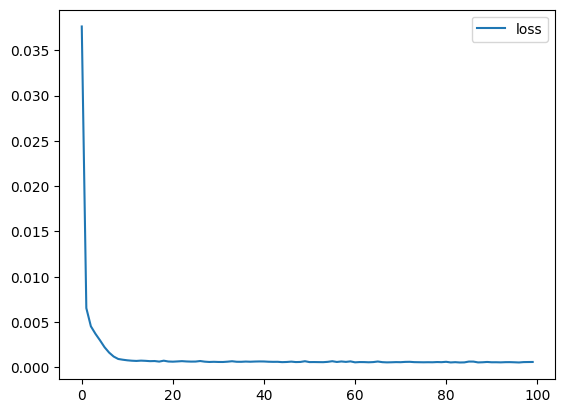

In [72]:
pd.DataFrame(history.history).plot()
plt.show()

In [80]:
#  Hacer una predicción con nuevos datos
x_input = np.array([[8500, 90], [8600, 89], [8700, 88]])
x_input[:, 0] = scaler_demand.transform(x_input[:, 0].reshape(-1, 1)).flatten()
x_input[:, 1] = scaler_rrp.transform(x_input[:, 1].reshape(-1, 1)).flatten()

In [81]:
x1 = x_input[:, 0].reshape((1, n_steps, n_features))
x2 = x_input[:, 1].reshape((1, n_steps, n_features))
yhat = model.predict([x1, x2], verbose=0)

In [82]:
#  Convertir predicción a escala original
yhat_original = scaler_demand.inverse_transform(yhat.reshape(-1, 1))

print(f"Predicción de TOTALDEMAND: {yhat_original[0][0]}")

Predicción de TOTALDEMAND: 5895.38037109375


## Múltiples series paralelas (multivariable forecasting)

In [89]:
# Datos reales (TOTALDEMAND y RRP)
total_demand = df_resampled["TOTALDEMAND"].values.reshape(-1, 1)
rrp = df_resampled["RRP"].values.reshape(-1, 1)

# Normalizar los datos
scaler = MinMaxScaler()
total_demand = scaler.fit_transform(total_demand)
rrp = scaler.fit_transform(rrp)

dataset = np.hstack([total_demand, rrp])

In [90]:
# Función para dividir la secuencia en datos de entrada/salida
def split_multiple_forecasting_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix, :], sequence[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [91]:
# Generar datos de entrenamiento
X_m, y_m = split_multiple_forecasting_sequence(dataset, n_steps)
n_features = X_m.shape[2]

In [92]:
# Definir el modelo CNN
model_4 = Sequential()
model_4.add(Input(shape=(n_steps, n_features)))
model_4.add(Conv1D(64, 2, activation='relu'))
model_4.add(MaxPooling1D())
model_4.add(Flatten())
model_4.add(Dense(50, activation='relu'))
model_4.add(Dense(n_features))
model_4.compile(optimizer='adam', loss='mse')

In [93]:
# Entrenar el modelo
history_4 = model_4.fit(X_m, y_m, epochs=1000, verbose=0)

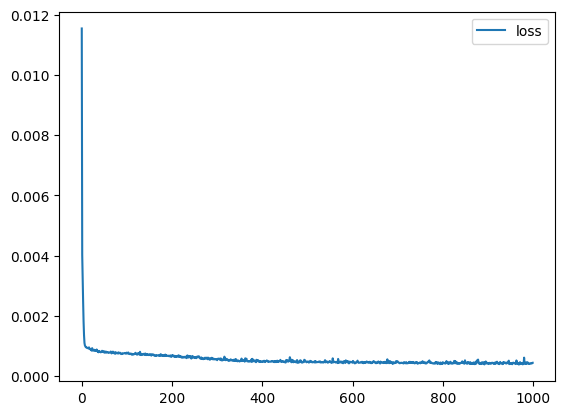

In [94]:
# Graficar la pérdida
pd.DataFrame(history_4.history).plot()
plt.show()

In [99]:
scaler = MinMaxScaler()
scaler.fit(dataset)  # Asegurarse de ajustar con los datos completos

MinMaxScaler()

In [102]:
# Probar el modelo con nuevos datos
test_input = np.array([[8500, 90], [8600, 89], [8700, 88]])  # Datos de prueba
test_input = scaler.transform(test_input)
test_input = test_input.reshape((1, n_steps, n_features))


In [103]:
yhat = model_4.predict(test_input, verbose=0)
yhat_original = scaler.inverse_transform(yhat.reshape(-1, n_features))
print(f"Predicción de TOTALDEMAND y RRP: {yhat_original}")

Predicción de TOTALDEMAND y RRP: [[7588.9604 3257.2563]]


## Multi-output CNN Model

In [127]:
# Definir la entrada
visible = Input(shape=(n_steps, n_features))

# Definir la CNN
cnn = Conv1D(64, 2, activation='relu')(visible)
cnn = MaxPooling1D()(cnn)
cnn = Flatten()(cnn)
cnn = Dense(50, activation='relu')(cnn)

# Definir salidas
output1 = Dense(1, name="output_totaldemand")(cnn)
output2 = Dense(1, name="output_rrp")(cnn)

# Construir modelo
model_5 = Model(inputs=visible, outputs=[output1, output2])
model_5.compile(optimizer='adam', loss='mse')

In [128]:
model_5.summary()

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, 3, 2)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_8 (Conv1D)         │ (None, 2, 64)          │            320 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_8           │ (None, 1, 64)          │              0 │ conv1d_8[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_8 (Flatten)       │ (None, 64)             │              0 │ max_pooling1d_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_19 (Dense)          │ (None, 50)             │          3,250 │ flatten_8[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output_totaldemand        │ (None, 1)              │             51 │ dense_19[0][0]         │
│ (Dense)                   │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output_rrp (Dense)        │ (None, 1)              │             51 │ dense_19[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 3,672 (14.34 KB)

 Trainable params: 3,672 (14.34 KB)

 Non-trainable params: 0 (0.00 B)

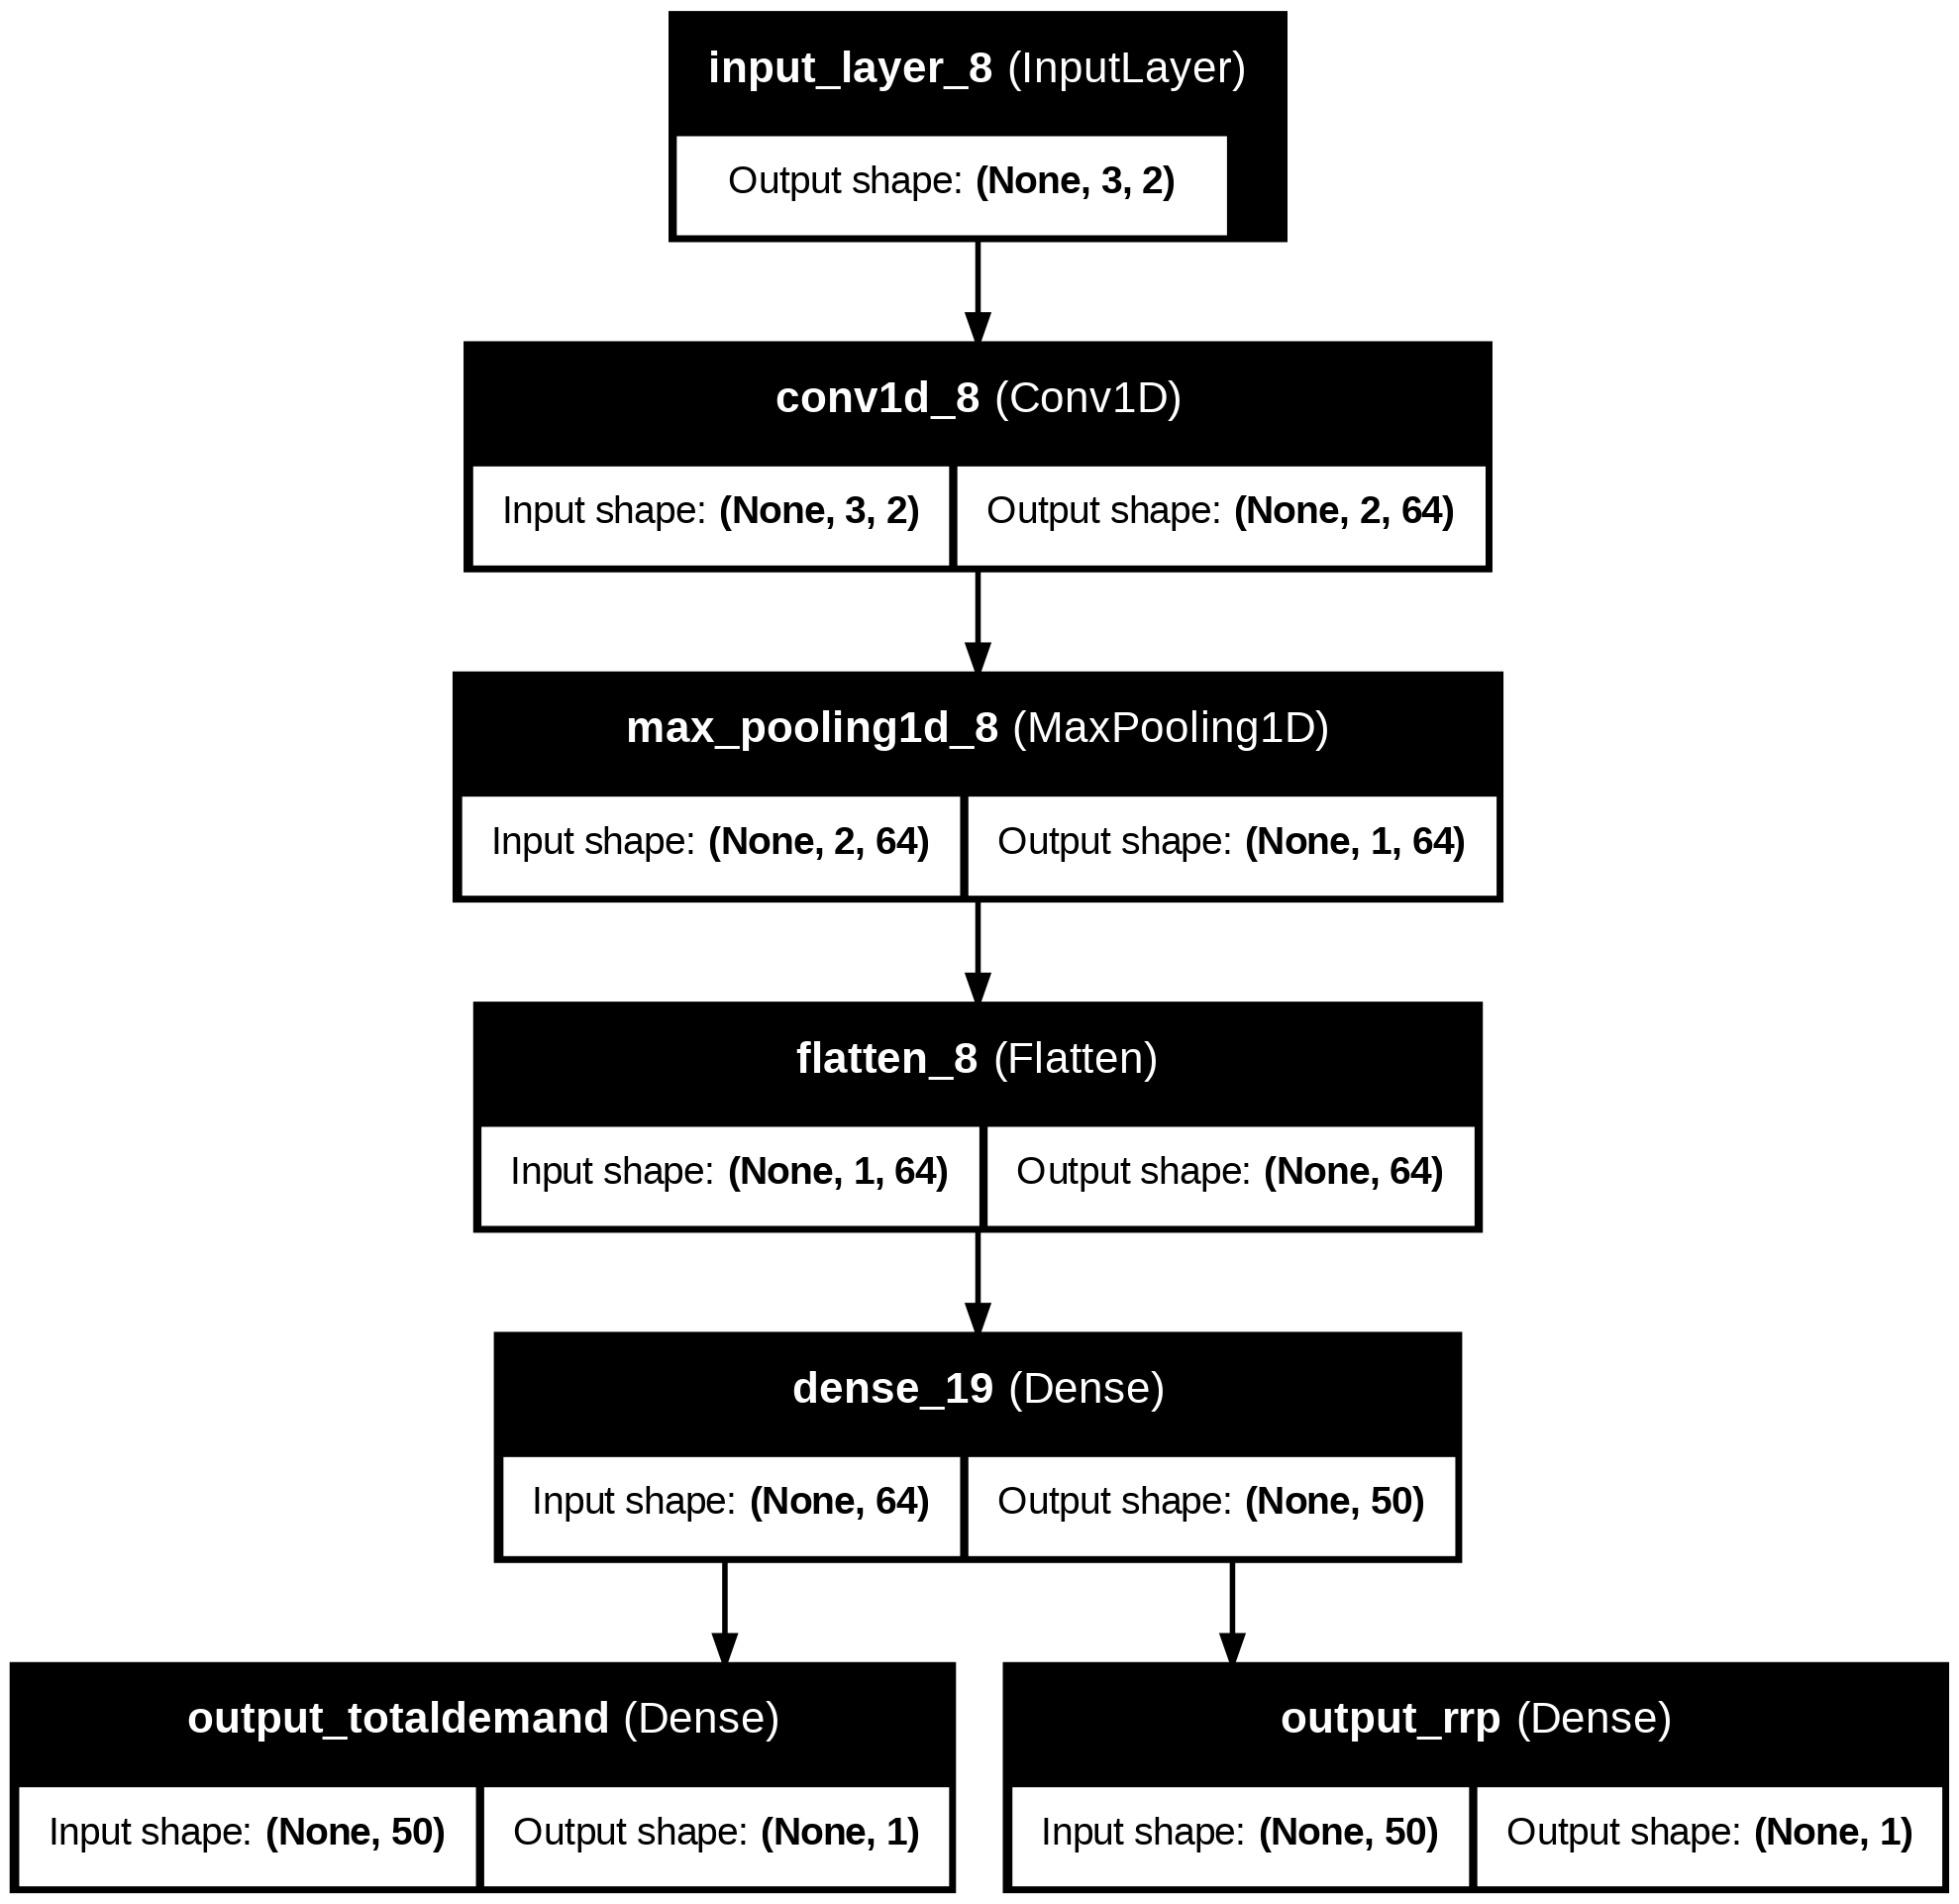

In [129]:
plot_model(model_5, show_shapes=True, show_layer_names=True)


<Axes: >

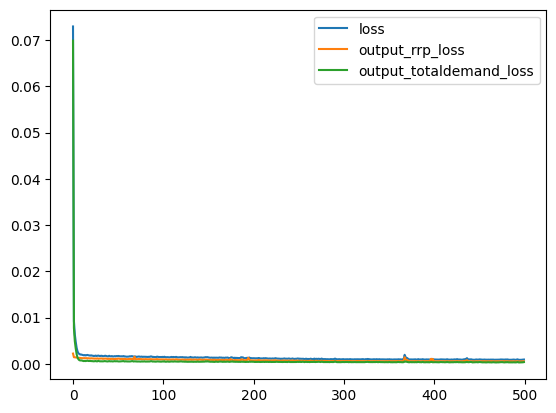

In [130]:
history_5 = model_5.fit(X_m, [y1, y2], epochs=500, verbose=0)
pd.DataFrame(history_5.history).plot()

In [131]:
# Datos de prueba (escalados con el mismo scaler)
test_input = np.array([[8500, 90], [8600, 89], [8700, 88]])
test_input = scaler.transform(test_input)
test_input = test_input.reshape((1, n_steps, n_features))

# Realizar predicción
yhat = model_5.predict(test_input, verbose=0)
print("Predicción TOTALDEMAND:", yhat[0])
print("Predicción RRP:", yhat[1])


Predicción TOTALDEMAND: [[6589.892]]
Predicción RRP: [[1792.0504]]


## Modelos CNN de pasos múltiples

In [139]:
def split_univariate_sequence_m_step(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out

        # comprobar si estamos más allá de la secuencia
        if out_end_ix > len(sequence):
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [140]:
# Probemos la función creada
# Definir secuencia de entrada
raw_seq = [6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000]
# elegir un número de pasos de tiempo
n_steps_in, n_steps_out = 3, 2
# Particionar mis datos
X, y = split_univariate_sequence_m_step(raw_seq, n_steps_in, n_steps_out)
# Resumir los datos
[print(X[i], y[i]) for i in range(len(X))];

[6000 6500 7000] [7500 8000]
[6500 7000 7500] [8000 8500]
[7000 7500 8000] [8500 9000]
[7500 8000 8500] [9000 9500]
[8000 8500 9000] [ 9500 10000]


In [141]:
# Debemos tranformar nuestro datos de [samples, timesteps] a [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
X.shape

(5, 3, 1)

In [142]:
# Crear nuestro modelo
model_6 = Sequential()
model_6.add(keras.layers.Input(shape=(n_steps, n_features)))
model_6.add(Conv1D(64, 2, activation='relu'))
model_6.add(MaxPooling1D())
model_6.add(Flatten())
model_6.add(Dense(50, activation='relu'))
model_6.add(Dense(n_steps_out))
model_6.compile(optimizer='adam', loss='mse')

model_6.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_9 (Conv1D)                    │ (None, 2, 64)               │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_9 (MaxPooling1D)       │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 50)                  │           3,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 2)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,544 (13.84 KB)

 Trainable params: 3,544 (13.84 KB)

 Non-trainable params: 0 (0.00 B)

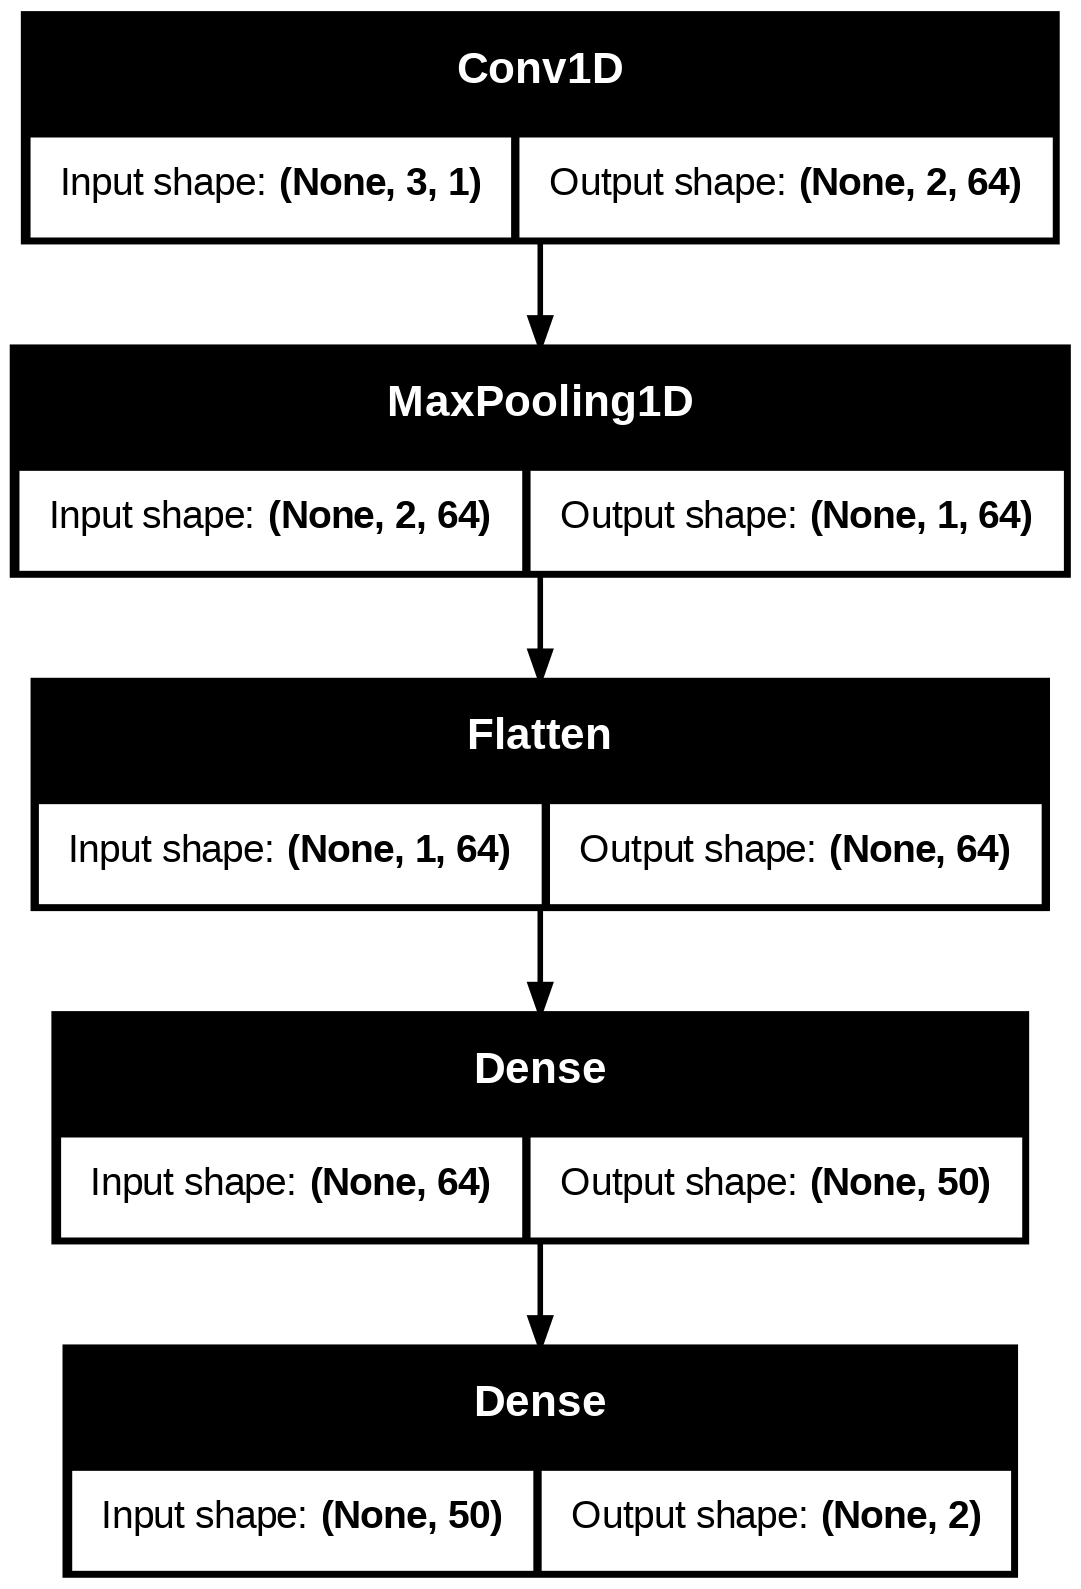

In [143]:
plot_model(model_6, show_layer_names=False, show_shapes=True,)

In [144]:
# fit model
history_6 = model_6.fit(X, y, epochs=1000, verbose=0)

<Axes: >

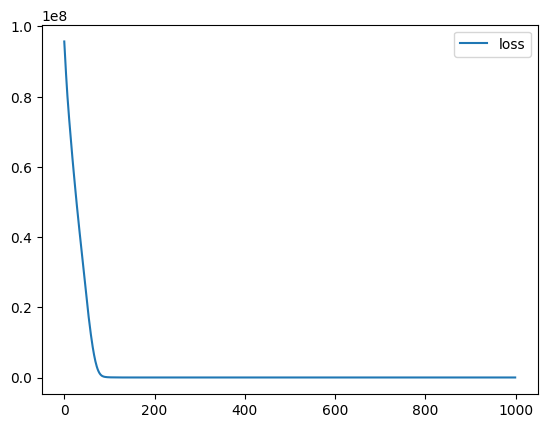

In [145]:
pd.DataFrame(history_6.history).plot()

In [146]:
# Predecir con nuestro modelo
x_input = np.array([7000, 8000, 9000])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model_6.predict(x_input, verbose=0)
print('Predicción', yhat)

Predicción [[9318.256 9878.949]]


## Serie temporal multivariada

In [147]:
# dividir una secuencia multivariada en muestras
def split_multivariate_sequence_m_step(sequence: np.ndarray, n_steps_in: int, n_steps_out: int):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out - 1

        # comprobar si estamos más allá de la secuencia
        if out_end_ix > len(sequence):
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix, :-1], sequence[end_ix-1:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [148]:
dataset

array([[0.32302662, 0.04525171],
       [0.29989182, 0.0452203 ],
       [0.2622723 , 0.04505461],
       ...,
       [0.4258135 , 0.04348212],
       [0.40557246, 0.0448862 ],
       [0.39202928, 0.03698967]])

In [149]:
# Elegir un número de pasos de tiempo
n_steps_in, n_steps_out = 3, 2

X, y = split_multivariate_sequence_m_step(dataset, n_steps_in, n_steps_out)

In [150]:
# Mostrar los resultados
print(X.shape, y.shape)
for i in range(len(X)):
    print(X[i], y[i])

(1294, 3, 1) (1294, 2)
[[0.32302662]
 [0.29989182]
 [0.2622723 ]] [0.04505461 0.04511417]
[[0.29989182]
 [0.2622723 ]
 [0.22992993]] [0.04511417 0.04286482]
[[0.2622723 ]
 [0.22992993]
 [0.18342342]] [0.04286482 0.04192642]
[[0.22992993]
 [0.18342342]
 [0.15639609]] [0.04192642 0.04211757]
[[0.18342342]
 [0.15639609]
 [0.13268174]] [0.04211757 0.04291897]
[[0.15639609]
 [0.13268174]
 [0.11956491]] [0.04291897 0.0298171 ]
[[0.13268174]
 [0.11956491]
 [0.12876943]] [0.0298171  0.02910288]
[[0.11956491]
 [0.12876943]
 [0.13634406]] [0.02910288 0.03670647]
[[0.12876943]
 [0.13634406]
 [0.17668159]] [0.03670647 0.04429057]
[[0.13634406]
 [0.17668159]
 [0.22817299]] [0.04429057 0.0507619 ]
[[0.17668159]
 [0.22817299]
 [0.32177732]] [0.0507619  0.05785649]
[[0.22817299]
 [0.32177732]
 [0.42297596]] [0.05785649 0.05941761]
[[0.32177732]
 [0.42297596]
 [0.48329969]] [0.05941761 0.05283147]
[[0.42297596]
 [0.48329969]
 [0.50609209]] [0.05283147 0.04188256]
[[0.48329969]
 [0.50609209]
 [0.4876614

In [151]:
n_features = X.shape[2]

# Definir el modelo
model_7 = Sequential()
model_7.add(keras.layers.Input(shape=(n_steps, n_features)))
model_7.add(Conv1D(64, 2, activation='relu'))
model_7.add(MaxPooling1D())
model_7.add(Flatten())
model_7.add(Dense(50, activation='relu'))
model_7.add(Dense(n_steps_out))
model_7.compile(optimizer='adam', loss='mse')
# fit model_7
model_7.fit(X, y, epochs=2000, verbose=0)

model_7.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_10 (Conv1D)                   │ (None, 2, 64)               │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_10 (MaxPooling1D)      │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 50)                  │           3,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 2)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,634 (41.54 KB)

 Trainable params: 3,544 (13.84 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,090 (27.70 KB)

In [155]:
# Tomar la última ventana de datos de X
x_input = X[-1].reshape((1, n_steps_in, n_features))

# Predecir con el modelo
yhat = model_7.predict(x_input, verbose=0)
print(yhat)


[[0.04781842 0.04349786]]


In [156]:
x_input = X[100].reshape((1, n_steps_in, n_features))

In [157]:
nuevo_input = np.array([[0.3], [0.25], [0.2]])
x_input = nuevo_input.reshape((1, n_steps_in, n_features))

yhat = model_7.predict(x_input, verbose=0)
print(yhat)


[[0.03962269 0.03502005]]


## Serie temporal multivariada predicción múltiple de cada entrada

In [158]:
# dividir una secuencia multivariada en muestras
def split_multivariate_sequence_m_step_parallel(sequence: np.ndarray, n_steps_in: int, n_steps_out: int):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out

        # comprobar si estamos más allá de la secuencia
        if out_end_ix > len(sequence):
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix, :], sequence[end_ix:out_end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [159]:
dataset

array([[0.32302662, 0.04525171],
       [0.29989182, 0.0452203 ],
       [0.2622723 , 0.04505461],
       ...,
       [0.4258135 , 0.04348212],
       [0.40557246, 0.0448862 ],
       [0.39202928, 0.03698967]])

In [160]:
# Elegir un número de pasos de tiempo
n_steps_in, n_steps_out = 3, 2

X, y = split_multivariate_sequence_m_step_parallel(dataset, n_steps_in, n_steps_out)

In [161]:
# Mostrar los resultados
print(X.shape, y.shape)
for i in range(len(X)):
    print(X[i], y[i])

Se han truncado las últimas 5000 líneas del flujo de salida.
[[0.4738226  0.08753281]
 [0.45404169 0.09396137]
 [0.43527991 0.08963974]] [[0.4035772  0.07553557]
 [0.38149321 0.07968555]]
[[0.45404169 0.09396137]
 [0.43527991 0.08963974]
 [0.4035772  0.07553557]] [[0.38149321 0.07968555]
 [0.36282254 0.06300551]]
[[0.43527991 0.08963974]
 [0.4035772  0.07553557]
 [0.38149321 0.07968555]] [[0.36282254 0.06300551]
 [0.34116103 0.06238009]]
[[0.4035772  0.07553557]
 [0.38149321 0.07968555]
 [0.36282254 0.06300551]] [[0.34116103 0.06238009]
 [0.31366847 0.06037279]]
[[0.38149321 0.07968555]
 [0.36282254 0.06300551]
 [0.34116103 0.06238009]] [[0.31366847 0.06037279]
 [0.27459932 0.06341217]]
[[0.36282254 0.06300551]
 [0.34116103 0.06238009]
 [0.31366847 0.06037279]] [[0.27459932 0.06341217]
 [0.24204632 0.05559253]]
[[0.34116103 0.06238009]
 [0.31366847 0.06037279]
 [0.27459932 0.06341217]] [[0.24204632 0.05559253]
 [0.20702068 0.05558657]]
[[0.31366847 0.06037279]
 [0.27459932 0.06341217]


In [162]:
# flatten output
n_output = y.shape[1] * y.shape[2]
y = y.reshape((y.shape[0], n_output))
y.shape

(1293, 4)

In [163]:
y, X.shape

(array([[0.22992993, 0.04511417, 0.18342342, 0.04286482],
        [0.18342342, 0.04286482, 0.15639609, 0.04192642],
        [0.15639609, 0.04192642, 0.13268174, 0.04211757],
        ...,
        [0.46623096, 0.03863309, 0.4258135 , 0.04348212],
        [0.4258135 , 0.04348212, 0.40557246, 0.0448862 ],
        [0.40557246, 0.0448862 , 0.39202928, 0.03698967]]),
 (1293, 3, 2))

In [164]:
n_features = X.shape[2]

# Definimos nuestro modelo
model_8 = Sequential()
model_8.add(keras.layers.Input(shape=(n_steps, n_features)))
model_8.add(Conv1D(64, 2, activation='relu'))
model_8.add(MaxPooling1D())
model_8.add(Flatten())
model_8.add(Dense(50, activation='relu'))
model_8.add(Dense(n_output))
model_8.compile(optimizer='adam', loss='mse')

# fit model_8
history_8 = model_8.fit(X, y, epochs=1000, verbose=0)

<Axes: >

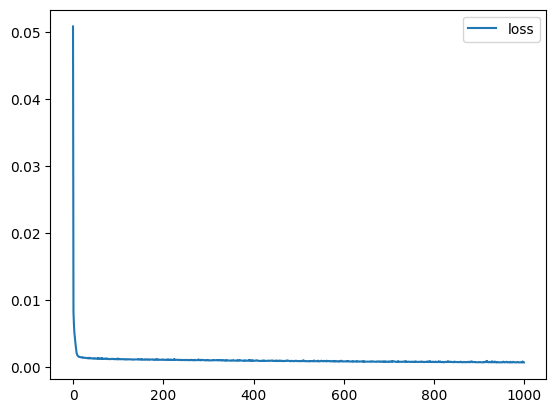

In [165]:
pd.DataFrame(history_8.history).plot()

In [171]:
# Probar nuestro modelo
x_input = X[100].reshape((1, n_steps_in, n_features))
nuevo_input = np.array([[0.3], [0.25], [0.2]])

yhat = model_8.predict(x_input, verbose=0)
print(yhat)

[[0.11173479 0.03871218 0.10298061 0.03728561]]


In [172]:
[yhat[i].reshape(n_steps_out, n_features) for i in range(yhat.shape[0])]

[array([[0.11173479, 0.03871218],
        [0.10298061, 0.03728561]], dtype=float32)]